Del sitio web Kaggle hemos obtenido la data house.csv, la cual posee el precio de las casas con diferentes características, por lo que en esta parte se espera que usted pueda aplicar las diferentes técnicas aprendidas en este módulo.
Usted encontrará dos archivos, uno con la base y otro archivo data.txt con la descripción de las variables de la data. Para este ejercicio debe tener las siguientes consideraciones:
Debe cargar la base y eliminar las siguientes variables, Alley, FireplaceQu, PoolQC,  Fence,  MiscFeature,  LotFrontage.

 1) Luego  realice  un  resumen estadístico con las variables que han quedado en la base

 RESUMEN ESTADÍSTICO !._

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Definir las rutas de los archivos
ruta_house = './datos/house.csv'

# Cargar el archivo CSV
df = pd.read_csv(ruta_house)

# Eliminar las columnas especificadas
df = df.drop(columns=['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'LotFrontage'])

# Obtener un resumen estadístico de las columnas restantes
resumen = df.describe()

print(resumen)


                Id   MSSubClass        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean    730.500000    56.897260   10516.828082     6.099315     5.575342   
std     421.610009    42.300571    9981.264932     1.382997     1.112799   
min       1.000000    20.000000    1300.000000     1.000000     1.000000   
25%     365.750000    20.000000    7553.500000     5.000000     5.000000   
50%     730.500000    50.000000    9478.500000     6.000000     5.000000   
75%    1095.250000    70.000000   11601.500000     7.000000     6.000000   
max    1460.000000   190.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   161.319273  ..

RESUMEN ESTADÍSTICO 2.-

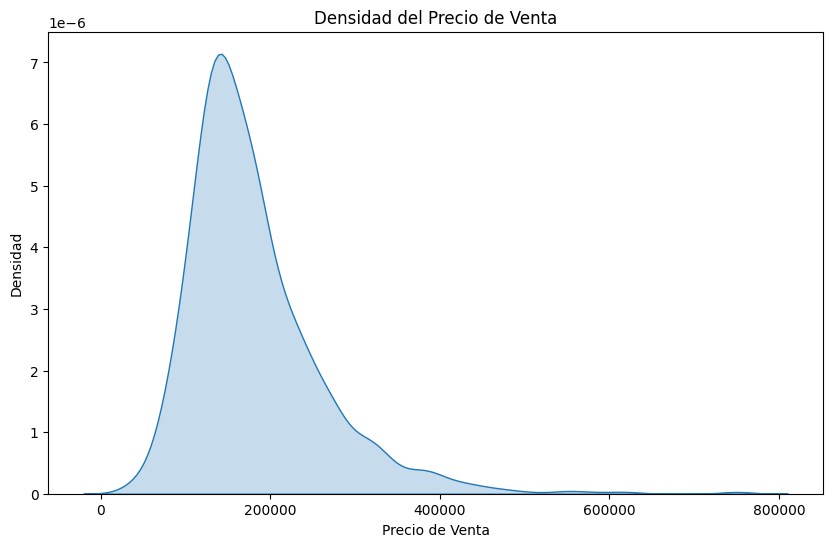

In [2]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['SalePrice'], fill=True)
plt.title('Densidad del Precio de Venta')
plt.xlabel('Precio de Venta')
plt.ylabel('Densidad')
plt.show()


El gráfico que has proporcionado parece ser un diagrama de densidad del precio de venta de casas. La curva asimétrica con un pico alrededor de los $200,000 y una cola larga hacia la derecha sugiere que la mayoría de las casas se venden por debajo de este precio, con menos casas vendiéndose a precios más altos. Este tipo de distribución es común en datos de precios de vivienda, donde hay una concentración de propiedades más asequibles y pocas propiedades de lujo con precios mucho más altos.

La asimetría positiva indica que hay una cantidad significativa de casas que se venden a un precio mucho más alto que el promedio, lo que podría ser debido a casas de lujo o propiedades en áreas de alta demanda. Para un joven recién graduado, esto sugiere que hay opciones disponibles en el extremo inferior del mercado, pero también destaca la existencia de un segmento de mercado mucho más caro.


Basándome en la descripción del gráfico de densidad del precio de venta de casas, parece que hay una concentración significativa de casas en el rango de precio más bajo, con un pico alrededor de los $200,000. Esto sugiere que un joven recién graduado podría considerar casas en este rango de precio o incluso más bajo, ya que representan una porción considerable del mercado y podrían ser más asequibles.

Es importante tener en cuenta que este es solo un punto de partida y que el joven debería considerar otros factores como la ubicación, el tamaño y la condición de la propiedad, así como su situación financiera personal, antes de tomar una decisión. Además, sería prudente buscar asesoramiento financiero profesional para determinar un presupuesto realista basado en sus ingresos y gastos.

RESUMEN ESTADÍSTICO 3.-

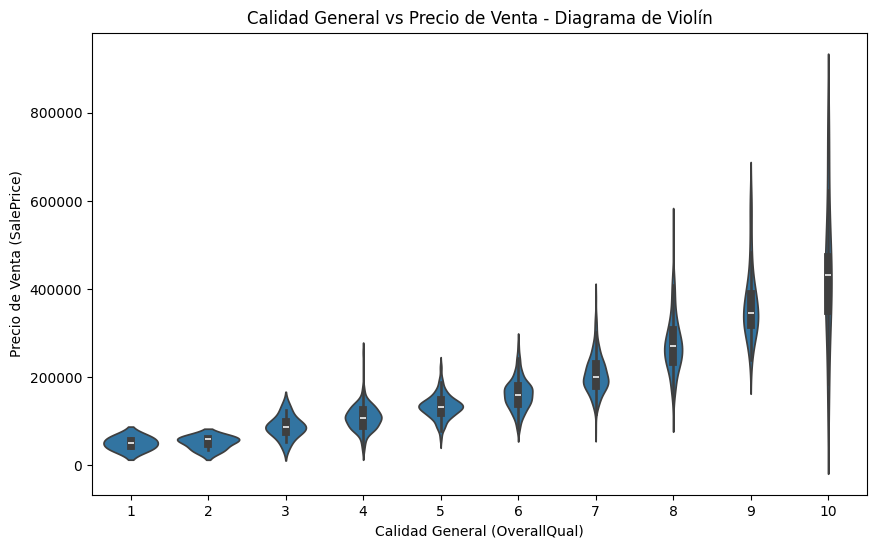

In [3]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='OverallQual', y='SalePrice', data=df)
plt.title('Calidad General vs Precio de Venta - Diagrama de Violín')
plt.xlabel('Calidad General (OverallQual)')
plt.ylabel('Precio de Venta (SalePrice)')
plt.show()


El gráfico de violín que has proporcionado muestra la relación entre la Calidad General (OverallQual) y el Precio de Venta de las casas. Aquí hay algunos análisis que se pueden extraer:

Relación Precio-Calidad: Existe una tendencia clara de que a medida que la calidad general de las casas aumenta, también lo hace el precio de venta. Esto sugiere que la calidad es un factor importante en la determinación del precio.

Variabilidad de Precios: La variabilidad en los precios de venta aumenta con la calidad de la casa. Las casas con calificaciones más altas muestran una mayor dispersión en los precios, lo que podría indicar una variedad más amplia de características o ubicaciones que afectan al precio.

Distribución de Precios: Para cada nivel de calidad, la distribución de precios es asimétrica, con una cola más larga hacia los precios más altos, lo que indica la presencia de algunas casas de lujo o excepcionales en cada categoría de calidad.

Para un joven recién graduado, podría ser recomendable considerar casas en el rango de calidad media, donde la relación calidad-precio puede ser más favorable y los precios son relativamente más bajos y consistentes. Esto podría proporcionar un buen equilibrio entre asequibilidad y calidad de vida. Sin embargo, la elección final debe basarse en una evaluación detallada de sus necesidades y capacidades financieras.

RESUMEN ESTADÍSTICO 4.-

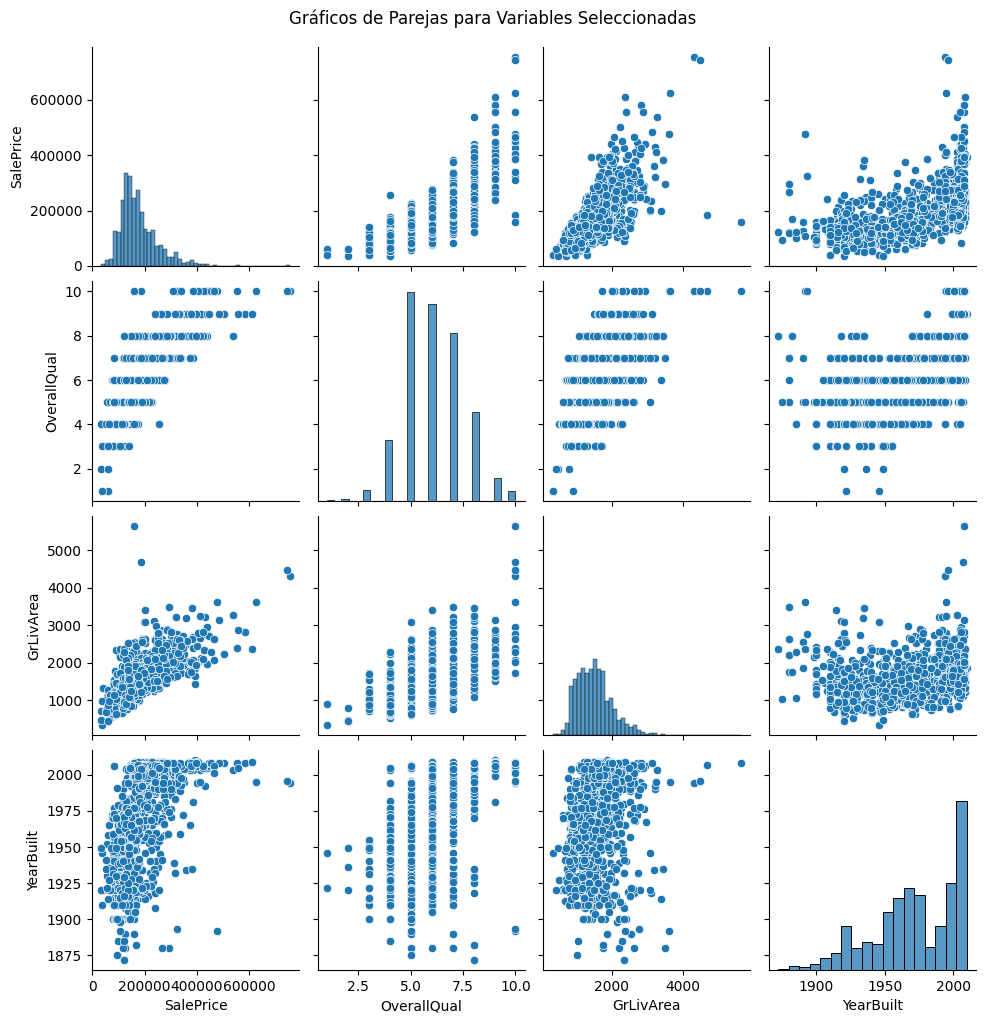

In [4]:
sns.pairplot(df[['SalePrice', 'OverallQual', 'GrLivArea', 'YearBuilt']])
plt.suptitle('Gráficos de Parejas para Variables Seleccionadas', y=1.02)
plt.show()


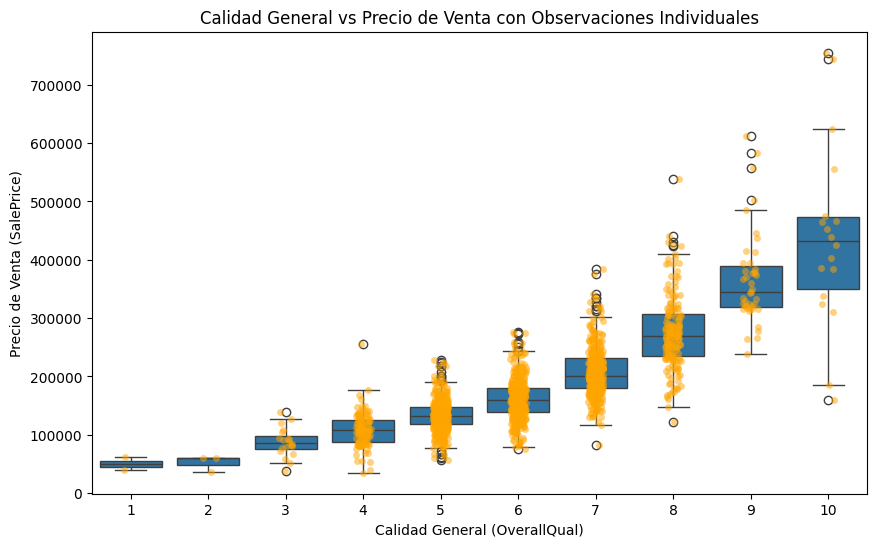

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
sns.stripplot(x='OverallQual', y='SalePrice', data=df, color='orange', alpha=0.5)
plt.title('Calidad General vs Precio de Venta con Observaciones Individuales')
plt.xlabel('Calidad General (OverallQual)')
plt.ylabel('Precio de Venta (SalePrice)')
plt.show()


El gráfico  representa la relación entre la Calidad General (OverallQual) y el Precio de Venta de las casas. A

Calidad General (OverallQual): Está en una escala del 1 al 10, donde cada número representa un nivel de calidad de la construcción y el diseño de las casas.

Precio de Venta: Representado en el eje y, muestra la variación de precios de venta de las casas.

Distribución del Precio: Las cajas azules indican los rangos intercuartílicos de precios para cada nivel de calidad, mostrando la mediana y la variabilidad del precio dentro de cada nivel.

Outliers: Los puntos amarillos representan valores atípicos o “outliers”, que son precios de venta que caen fuera del rango típico para ese nivel de calidad.

Este tipo de gráfico nos sirve  para visualizar cómo la calidad percibida de una casa puede afectar su precio de venta en el mercado.

RESUMEN ESTADÍSTICO 5.-

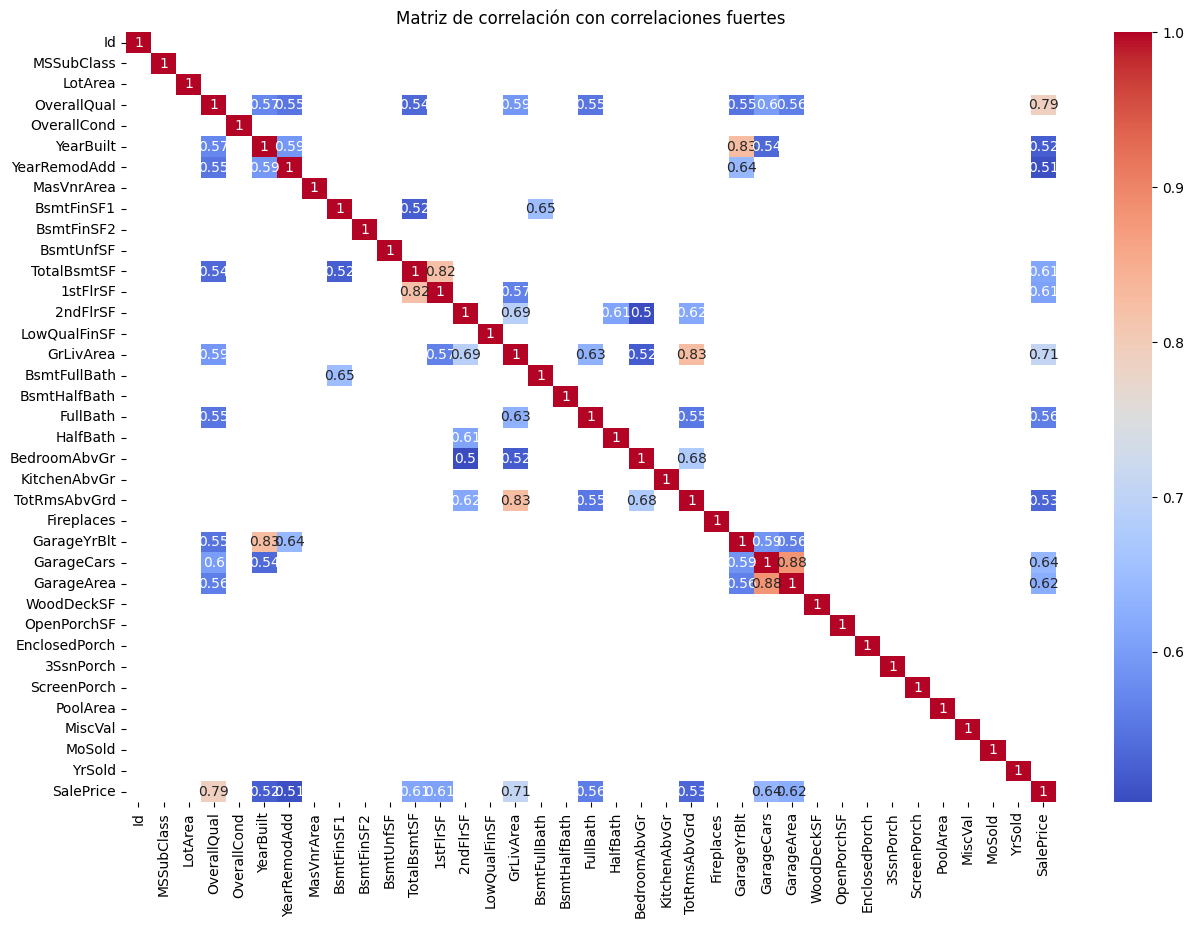

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Identificar las columnas numéricas
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Crear un nuevo DataFrame que solo contenga las columnas numéricas
df_num = df[num_cols]


# Matriz de correlación
corr_matrix = df_num.corr()

# Establecer un umbral
threshold = 0.5

# Crear una máscara para ocultar las correlaciones débiles
mask = abs(corr_matrix) < threshold

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', mask=mask)
plt.title('Matriz de correlación con correlaciones fuertes')
plt.show()

El gráfico es una matriz de correlación que muestra la relación entre diferentes variables de un conjunto de datos

Correlaciones Fuertes: Los cuadros rojos oscuros indican una alta correlación positiva entre las variables, lo que significa que cuando una variable aumenta, la otra también tiende a aumentar.(Se creo una Mascara para mostrar las correlaciones mas fuertes)

Valores de Correlación: Los números dentro de los cuadros representan el coeficiente de correlación, que varía de -1 a 1. Un número cercano a 1 indica una fuerte correlación positiva.

Podemos identificar posibles relaciones entre variables que podrían ser importantes para un análisis más detallado o para la construcción de modelos predictivos.

Ejemplo, si “OverallQual” tiene una alta correlación con “SalePrice”, esto sugiere que la calidad general de una casa es un buen predictor de su precio de venta.

2) Variables que distribuyen normal (en caso contrario, sugiere otra)
3) Construya Intervalos de confianza


In [7]:
import scipy.stats as stats

# Identificar las columnas numéricas
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Realizar una prueba de Shapiro-Wilk en cada columna numérica
for col in num_cols:
    _, p = stats.shapiro(df[col])
    if p >= 0.05:
        print(f'{col} se distribuye normalmente')

# Remuestreo
df_sample = df.sample(frac=0.5)

# Construir intervalos de confianza
for col in num_cols:
    mean = df_sample[col].mean()
    se = stats.sem(df_sample[col])
    ci = stats.t.interval(0.95, df_sample[col].size - 1, loc=mean, scale=se)
    print(f'El intervalo de confianza para {col} es {ci}')

MasVnrArea se distribuye normalmente
GarageYrBlt se distribuye normalmente
El intervalo de confianza para Id es (698.1524305272012, 759.2119530344426)
El intervalo de confianza para MSSubClass es (54.469829226628654, 60.95482830761792)
El intervalo de confianza para LotArea es (9838.752181330556, 11521.930010450267)
El intervalo de confianza para OverallQual es (5.959746260988861, 6.16080168421662)
El intervalo de confianza para OverallCond es (5.479162744760755, 5.638645474417327)
El intervalo de confianza para YearBuilt es (1968.34001073416, 1972.6983454302235)
El intervalo de confianza para YearRemodAdd es (1982.307080135545, 1985.3340157548662)
El intervalo de confianza para MasVnrArea es (nan, nan)
El intervalo de confianza para BsmtFinSF1 es (434.43140710405964, 504.4042093342965)
El intervalo de confianza para BsmtFinSF2 es (35.391267363356555, 57.66352715719139)
El intervalo de confianza para BsmtUnfSF es (516.0957390038553, 579.3946719550487)
El intervalo de confianza para Tot

4)  Testee hipótesis que apoyen/no apoyen las ofertas de compra.

p-valor para la prueba de la media del precio de las casas: 1.476445532734265e-19
p-valor para la prueba ANOVA: 1.558600282771154e-225


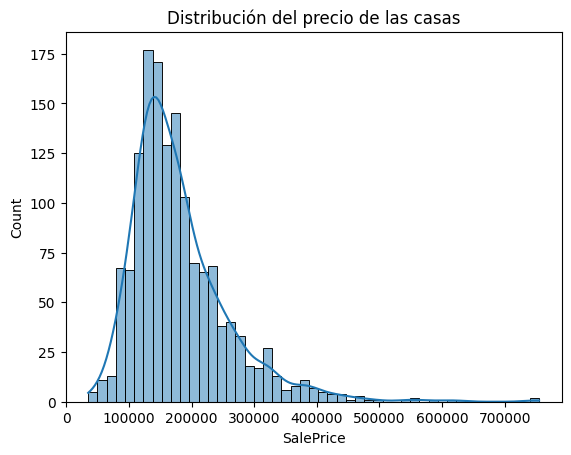

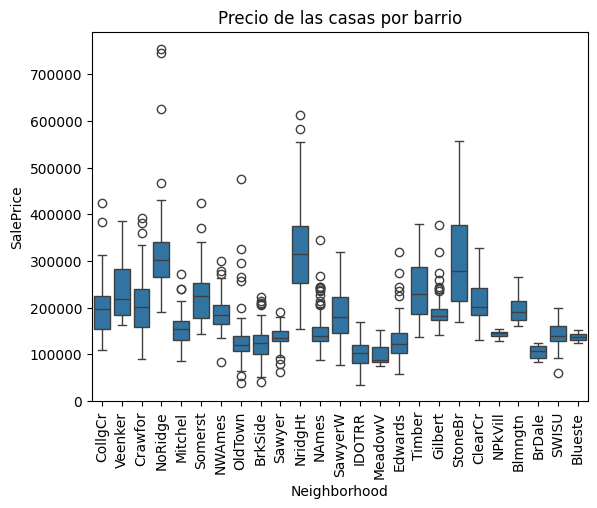

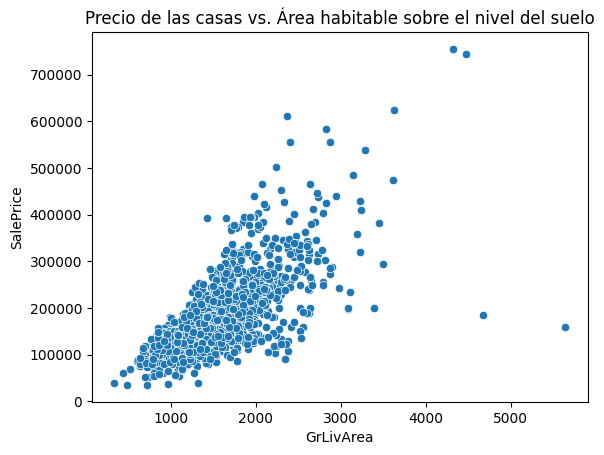

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prueba de hipótesis para la media del precio de las casas
mu = 200000  # Valor hipotético para la media
_, p_value = stats.ttest_1samp(df['SalePrice'], mu)
print(f'p-valor para la prueba de la media del precio de las casas: {p_value}')

# Prueba ANOVA para la diferencia en el precio de las casas entre los barrios
f_value, p_value = stats.f_oneway(*[df['SalePrice'][df['Neighborhood'] == n] for n in df['Neighborhood'].unique()])
print(f'p-valor para la prueba ANOVA: {p_value}')

# Gráficos
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribución del precio de las casas')
plt.show()

sns.boxplot(x='Neighborhood', y='SalePrice', data=df)
plt.title('Precio de las casas por barrio')
plt.xticks(rotation=90)
plt.show()

sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title('Precio de las casas vs. Área habitable sobre el nivel del suelo')
plt.show()


Prueba de hipótesis para la media del precio de las casas:

Se realiza una prueba t de una muestra para comparar la media del precio de venta de las casas con un valor hipotético de $200,000.

El p-valor obtenido es extremadamente bajo  1.476445532734265×10^(-19), lo que sugiere que hay evidencia estadística suficiente para rechazar la hipótesis nula de que la media del precio de venta es igual a $200,000.

Prueba ANOVA para la diferencia en el precio de las casas entre los barrios:
Se realiza un análisis de varianza (ANOVA) para determinar si hay diferencias significativas en el precio de venta medio entre los diferentes barrios.
El p-valor obtenido es también extremadamente bajo 1.558600282771154×10^(-225), indicando que hay diferencias significativas en el precio de venta entre los barrios.

  *   El histograma con la estimación de densidad del kernel (KDE) muestra la distribución del precio de las casas, proporcionando una visualización de la forma general de la distribución de precios.
  *   El gráfico de caja por barrio muestra la mediana, los cuartiles y los valores atípicos del precio de venta para cada barrio, lo que permite comparar visualmente los precios entre diferentes áreas.
  *   El gráfico de dispersión entre el área habitable sobre el nivel del suelo (GrLivArea) y el precio de venta muestra la relación entre el tamaño de la casa y su precio, lo que puede ayudar a identificar tendencias y posibles valores atípicos.

Estos resultados son consistentes con el análisis de la gráfica de dispersión que relaciona el área habitable sobre el nivel del suelo con el precio de las casas, sugiriendo que factores como el tamaño de la propiedad y la ubicación (barrio) son determinantes en el precio de venta de una casa.

También estos p-valores tan bajos sugieren que los resultados no se deben al azar y que hay factores, como la ubicación y las características de las casas, que influyen significativamente en los precios de venta.


   Neighborhood  PrecioMedio  Ranking
0       MeadowV      88000.0      1.0
1        IDOTRR     103000.0      2.0
2        BrDale     106000.0      3.0
3       OldTown     119000.0      4.0
4       Edwards     121750.0      5.0
5       BrkSide     124300.0      6.0
6        Sawyer     135000.0      7.0
7       Blueste     137500.0      8.0
8         SWISU     139500.0      9.0
9         NAmes     140000.0     10.0
10      NPkVill     146000.0     11.0
11      Mitchel     153500.0     12.0
12      SawyerW     179900.0     13.0
13      Gilbert     181000.0     14.0
14       NWAmes     182900.0     15.0
15      Blmngtn     191000.0     16.0
16      CollgCr     197200.0     17.0
17      ClearCr     200250.0     18.0
18      Crawfor     200624.0     19.0
19      Veenker     218000.0     20.0
20      Somerst     225500.0     21.0
21       Timber     228475.0     22.0
22      StoneBr     278000.0     23.0
23      NoRidge     301500.0     24.0
24      NridgHt     315000.0     25.0


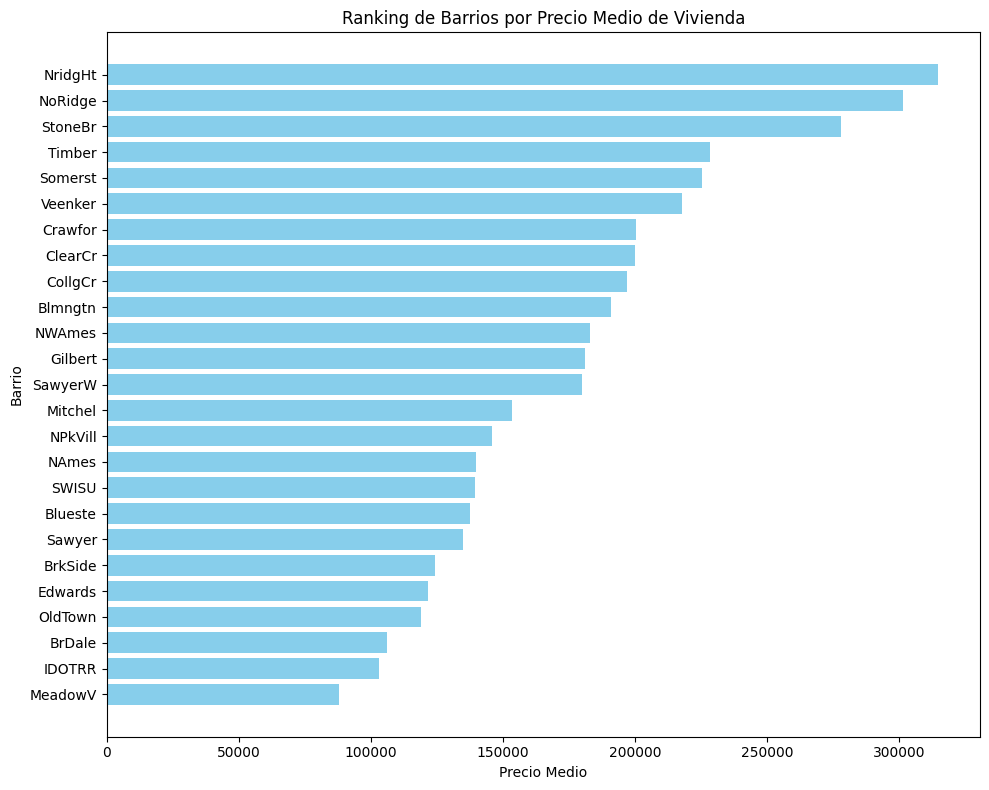

Los barrios con un precio medio entre 130000 y 150000 donde una persona recién egresado de la universidad podría comprar una casa son: 



,Neighborhood,PrecioMedio,Ranking
6,Sawyer,135000.0,7.0
7,Blueste,137500.0,8.0
8,SWISU,139500.0,9.0
9,NAmes,140000.0,10.0
10,NPkVill,146000.0,11.0


In [19]:
import matplotlib.pyplot as plt

precios_medios = df.groupby('Neighborhood')['SalePrice'].median().sort_values()
# Crear un DataFrame con el ranking
ranking_barrios = precios_medios.reset_index().rename(columns={'SalePrice': 'PrecioMedio'})
ranking_barrios['Ranking'] = ranking_barrios['PrecioMedio'].rank(method='min')

# Ordenar los barrios por precio medio de menor a mayor
ranking_barrios.sort_values(by='PrecioMedio', inplace=True)

# Imprimir el ranking de barrios
print(ranking_barrios)

# Crear un gráfico de barras
plt.figure(figsize=(10,8))
plt.barh(ranking_barrios['Neighborhood'], ranking_barrios['PrecioMedio'], color='skyblue')
plt.xlabel('Precio Medio')
plt.ylabel('Barrio')
plt.title('Ranking de Barrios por Precio Medio de Vivienda')
plt.tight_layout()  # Ajustar automáticamente los parámetros para dar espacio a las etiquetas
plt.show()

# Filtrar los barrios con un precio medio entre 180000 y 200000
barrios_filtrados = ranking_barrios[(ranking_barrios['PrecioMedio'] >= 130000) & (ranking_barrios['PrecioMedio'] <= 150000)]
#como hacer un salto de linea  al final de la cadena
print('Los barrios con un precio medio entre 130000 y 150000 donde una persona recién egresado de la universidad podría comprar una casa son: \n')

# Imprimir el DataFrame filtrado
barrios_filtrados.head(100)


Utiliza este ranking como una guía inicial para identificar los barrios que se ajustan a tu presupuesto y preferencias.
Recuerda que este ranking se basa únicamente en el precio medio y no toma en cuenta otros factores cualitativos que pueden ser importantes. Es recomendable complementar este análisis cuantitativo con una investigación cualitativa de los barrios que te interesan.